<a href="https://colab.research.google.com/github/MenelaosP/MLTraining/blob/main/CyberThreatHunting_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [2]:
# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [3]:
# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

In [4]:
# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
y = data['Class']
X = data.drop('Class',axis=1)
X.shape, y.shape

((284807, 30), (284807,))

In [6]:
# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

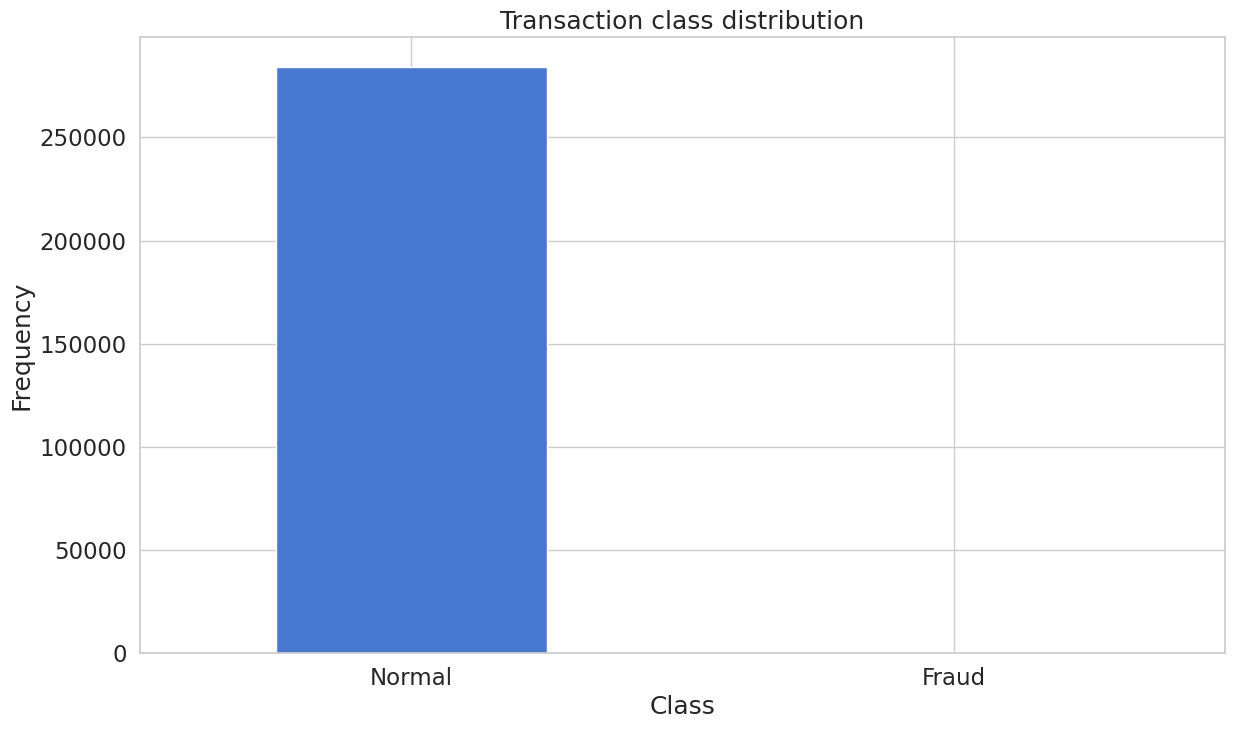

In [7]:
# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
# δημιουργία Random Forest αλγορίθμου
forest = RandomForestClassifier(max_depth=5)

In [9]:
# εκπαίδευση αλγόριθμου
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [10]:
# πρόβλεψη συνόλου δοκιμής
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

Accuracy: 0.99954
Precision: 0.95890
Recall: 0.75269
F1 Score: 0.84337

[[56866     3]
 [   23    70]] 



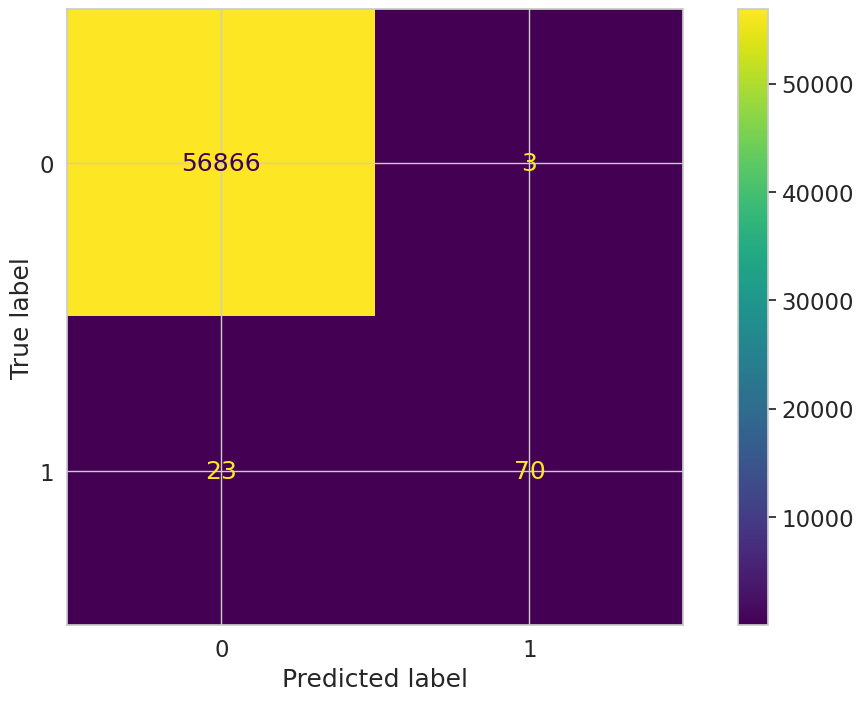

In [11]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, y_test_forest)
precision = precision_score(y_test, y_test_forest)
recall = recall_score(y_test, y_test_forest)
f1score = f1_score(y_test, y_test_forest)
confmatrix = confusion_matrix(y_test, y_test_forest)
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1 Score: {:.5f}\n".format(f1score))
print(confmatrix,"\n")
ConfusionMatrixDisplay(confusion_matrix=confmatrix).plot();